# Classificação

## O que é classificação?

Classificação pe o processo de prever a classe para um conjunto de pontos. Classes são, frequentemente, chamadas de alvos/labels ou categorias. Modelos preditivos de classificação é a tarefa de aproximação de uma função de mapeamento $f$ com variáveis de entrada $X$ e variáveis discretas de saída $y$.

Por exemplo, detecção de spam em provedores de email podem ser identificado como um problema de classificação. Este, é um classificador binário já que existem somente duas classes (spam ou não spam). Um classificador utiliza um conjunto de dados de treinamento para entender as variáveis de entreda se relacionam com a variável de saída. Nesse caso, emails spam e não spam precisam ser utilizados como dado de treinamento. Quando o classificador é devidamente treinado, este pode ser utilizado para detectar novos emails desconhecidos.

Classificação pertence à categoria de treinamento supervisionado, onde os alvos são fornecidos juntamente com os dados de entrada.

Existem aplicações de classificação em disersas áreas como:
* aprovação de crédito
* diagnóstico médico
* target marketing
* etc

Existem dois tipos de aprendizado: lazy (preguiçoso) e eager (ansioso)

## Classificador Lazy

Classificadores Lazy simplesmente guardam os dados de treinamento e esperam até que os dados de teste apareçam. Quando é o caso, a classificação é conduzida baseada nos dados de maior semelhança guardados nos dados de treinamento. Comparado com classificadores Eager, os classificadores Lazy passam menos tempo no treinamento e mais tempo para previsão.

## Classificador Eager

Classificadores Eager constroem um modelo de classificação com base no conjunto de dados de treinamento antes de receber dados para classificação. Ele deve poder se comprometer com uma única hipótese que cubra todo o espaço da instância. Devido à construção do modelo, os classificadores Eager levam muito tempo para treinar e menos tempo para prever.

## Classificador KNN (k-nearest neighbors)

O classificador KNN faz parte do conjunto de classificadores Lazy. Este, utiliza medidas de distância entre os pontos já classificados e o ponto a ser classificado para teterminar a classe do mesmo, onde o parâmetro conhecido como tamanho da vizinhança estabelece o númmero de pontos próximos considerados. 

Para demonstrar o uso do KNN, utilizaremos os dados contidos no arquivo ```exemplo2.csv```.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dados/exemplo2.csv')
df.head()

,idade,conta_corrente,risco
0,21.257389,783.127911,ruim
1,21.766573,979.747521,bom
2,25.321033,1065.328054,ruim
3,23.919268,1195.758078,bom
4,21.805298,1083.764450,bom


Semelhante ao ```exemplo1.csv```, esse arquivo contem a idade e o valor em conta de clientes em um banco. No ```exemplo2.csv```, foi acrescentada uma nova coluna identificando se o risco do cliente é bom ou ruim. Essa medida está associada a experiencia positiva ou negativa com crédito oferecido pelo banco.

Abaixo, temos a gráfico de dispersão comparando a idade e valor em conta para cada tipo de risco.

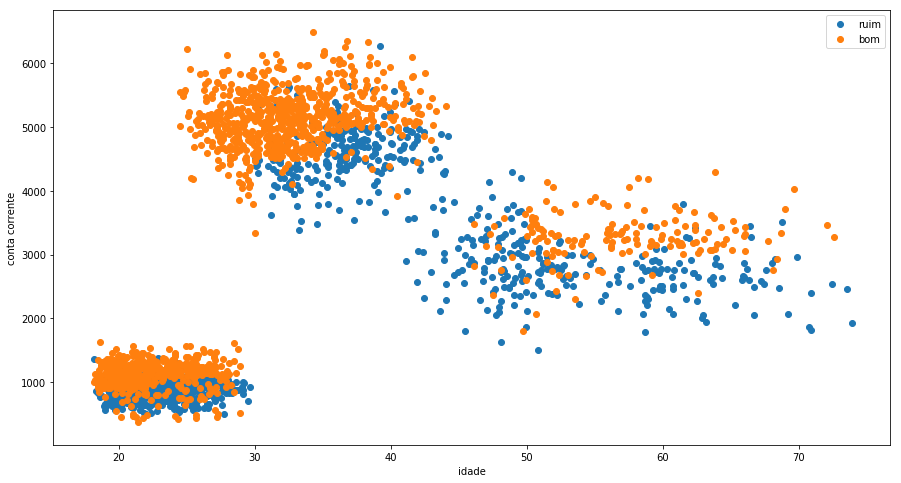

In [4]:
plt.figure(figsize=(15, 8))
plt.scatter(df[df.risco == 'ruim'].idade, df[df.risco == 'ruim'].conta_corrente)
plt.scatter(df[df.risco == 'bom'].idade, df[df.risco == 'bom'].conta_corrente)
plt.xlabel('idade')
plt.ylabel('conta corrente')
plt.legend(['ruim', 'bom'])

O objetivo do classificador será a determinação do risco de uma novo cliente, baseado na idade e valor em conta corrente do mesmo.

O classificador KNN está presente no pacote ```sklearn``` no caminho ```sklearn.neighbors``` e é identificado como ```KNeighborsClassifier```.

In [5]:
from sklearn.neighbors import KNeighborsClassifier

Para efetuar o treinamento do classificador, guardaremos as variáveis de entrada em uma variáveis chamada ```X``` e a variável de saída em ```y```. Para tanto, utilizaremos o comando ```DataFrame.drop('nome_da_coluna_excluida', axis=zero_para_linhas_um_para_colunas)```. Para o exemplo, eliminaremos a coluna ```risco``` das variáveis de entrada.

In [8]:
X = df.drop('risco', axis=1)
y = df.risco

Para executar o treinamento do classificador, utilizamos o comando ```KNeighborsClassifier(n_neighbors=numero_de_vizinhos).fit(X, y)```. Para o exemplo, faremos um teste com ```n_neighbors=5```. O classificador treinado será guardado em uma variável chamada ```knn```.

In [18]:
knn = KNeighborsClassifier(n_neighbors=11).fit(X, y)

Uma vez treinado, o classificador pode ser utilizado para determinar se um novo cliente possui risco bom ou ruim. Para tanto, utilizamos o comando ```predict()```. Faremos a previsão do risco para um novo cliente com 18 anos e 700 reais na conta corrente.

In [22]:
knn.predict([[18, 2200]])

array(['ruim'], dtype=object)

Obtemos a previsão de que o novo jovem cliente teria um risco ruim. Mas qual a certeza dessa previsão? Como verificar se o classificador possui uma boa qualidade nas previsões?

O método mais usual de aferição da qualidade de um classificador é a aplicação de um teste em parte do conjunto utilizado originalmente para treinamento. Como a porção separada para teste já está classificada, podemos medir o percentual de acerto do classificador, verificando assim a sua qualidade. Para separar o conjunto de treino e o conjunto de testes, utilizamos a função ```train_test_split()``` presente em ```sklearn.model_selection```. Para o cálculo da acurácia, utilizamos a função ```accuracy_score()``` presente em ```sklearn.metrics```.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Criaremos as variáveis ```X_train``` e ```y_train``` representando os inputs e outputs de treinamento e ```X_test```, ```y_test``` representando os inputs e outputs de teste. Na função ```train_test_split()``` passaremos como parâmetro o conjunto completo de inputs e outputs ```X``` e ```y``` juntamente com o parâmetro ```test_size``` (tamanho do conjunto de teste), que configuraremos com o valor de 0.33 (1/3). Para fixar a aleatoriedade da divisão dos conjuntos, configuraremos o parâmetro ```random_state=42```.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Criaremos um novo classificador KNN configurado com ```n_neighbors=5``` e o chamaremos de ```knn2```. Uma vez treinado, calcularemos a acuracidade do classificador utilizando a função ```accuracy_score()``` que recebe como parâmetros os inputs conhecidos e os inputs previstos.

In [24]:
knn2 = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)

accuracy_score(y_test, knn2.predict(X_test))

0.8024242424242424

Podemos aumentar a qualidade do classificador através do tratamento dos inputs. Nesse caso, temos duas variáveis que possuem escalas distintas. Aplicando uma função de normalização, podemos aumentar significamente a qualidade da acurácia.

Para o exemplo, aplicaremos o normalizador ```MinMaxScaler```.

In [25]:
from sklearn.preprocessing import MinMaxScaler

X_norm = MinMaxScaler().fit_transform(df[['idade', 'conta_corrente']])

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.33, random_state=42)

knn3 = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

accuracy_score(y_test, knn3.predict(X_test))

0.8715151515151515

Para efeito de teste, faremos a comparação do desempenho do knn com outros dois classificadores.

### SVM (Support Vector Machine)

O SVM é um classificador discriminativo formalmente definido por um hiperplano de separação. Em outras palavras, dado um conjunto de dados de treinamento classificados (aprendizado supervisionado), o algoritmo gera um hiperplano ideal que categoriza novos exemplos. No espaço bidimensional, esse hiperplano é uma linha que divide um plano em duas partes, onde cada classe fica em cada lado.

In [26]:
from sklearn.svm import SVC

svc = SVC().fit(X_train, y_train)

accuracy_score(y_test, svc.predict(X_test))

0.8387878787878787

## Floresta Aleatória

A floresta aleatória, como o próprio nome indica, consiste em um grande número de árvores de decisão individuais que funcionam como um conjunto. Cada árvore individual na floresta aleatória gera uma previsão de classe e a classe com mais votos se torna a previsão do nosso modelo.

O conceito fundamental por trás da floresta aleatória é simples, mas poderoso: a sabedoria das multidões. Na linguagem da ciência de dados, a razão pela qual o modelo funciona tão bem está associado ao fato de que um grande número de modelos (árvores) relativamente não correlacionados que operam como um comitê superará qualquer um dos modelos constituintes individuais.

Para este modelo, o parâmetro mais básico a ser definido é o número de árvores presente na floresta. 


In [27]:
from  sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)

accuracy_score(y_test, rfc.predict(X_test))

0.8872727272727273

Os dados contidos no arquivo ```exemplo3.csv``` apresentam um exemplo semelhante ao anterior, onde neste considera-se também o sexo do cliente.

In [29]:
df2 = pd.read_csv('exemplo3.csv')
df2.head()

,idade,conta_corrente,sexo,risco
0,21.257389,783.127911,masculino,ruim
1,21.766573,979.747521,feminino,bom
2,25.321033,1065.328054,feminino,bom
3,23.919268,1195.758078,feminino,bom
4,21.805298,1083.764450,feminino,bom


Para coluna ```sexo```, faremos a transformação através da binarização de variáveis categóricas. Utilizando o comando ``` pd.get_dummies(Series, prefix='nome_do_prefixo')```, criaremos as colunas ```sexo_feminino``` e ```sexo_masculino```, onde o valor 1 representa o valor verdadeiro e 0 o falso.

In [30]:
sexo = pd.get_dummies(df2.sexo, prefix='sexo')
sexo.head()

,sexo_feminino,sexo_masculino
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


Para concatenar o dataframe ```sexo``` com ```df2```, utilizamos o comando ```pd.concat(lista_de_dataframes, axis=1)```.

In [32]:
df2 = pd.concat([df2, sexo], axis=1)
df2.head()

,idade,conta_corrente,sexo,risco,sexo_feminino,sexo_masculino
0,21.257389,783.127911,masculino,ruim,0,1
1,21.766573,979.747521,feminino,bom,1,0
2,25.321033,1065.328054,feminino,bom,1,0
3,23.919268,1195.758078,feminino,bom,1,0
4,21.805298,1083.764450,feminino,bom,1,0


Aplicaremos o normalizador ```MinMaxScaler()``` para as colunas ```idade``` e ```conta_corrente```.

In [33]:
minmax = MinMaxScaler().fit(df[['idade', 'conta_corrente']])
df2[['idade', 'conta_corrente']] = minmax.transform(df[['idade', 'conta_corrente']]) 
df2.head()

,idade,conta_corrente,sexo,risco,sexo_feminino,sexo_masculino
0,0.055865,0.067202,masculino,ruim,0,1
1,0.064994,0.099389,feminino,bom,1,0
2,0.128726,0.113399,feminino,bom,1,0
3,0.103592,0.134751,feminino,bom,1,0
4,0.065689,0.116417,feminino,bom,1,0


Finalmente, aplicamos o treinamento e teste do classificador para verificar a acurácia do mesmo.

In [34]:
X = df2.drop(['risco', 'sexo'], axis=1)
y = df2.risco

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

rfc2 = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)

accuracy_score(y_test, rfc2.predict(X_test))

0.8218181818181818

O código abaixo mostra a aplicação do classificador.

In [37]:
import numpy as np

idade = 22
cc = 1200
sexo = 'masculino'

s = {'masculino': [0, 1], 'feminino': [1, 0]}
values = np.append(minmax.transform([[idade, cc]])[0], s[sexo])
rfc2.predict([values])

array(['bom'], dtype=object)